### Notebook to analyse the results for the different models as collected in a results folder

In [26]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np

# set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

In [27]:
def load_summary_stats(root_dir: str, filename_pattern: str = "summary_stats.json") -> pd.DataFrame:
    """
    Recursively scan `root_dir` for JSON files matching `filename_pattern` (e.g. 'summary_stats.json'),
    load them, and return a concatenated DataFrame with all fields.
    """
    all_data = []
    
    # Walk through all subfolders and look for JSON files named 'summary_stats.json'
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file == filename_pattern:
                file_path = os.path.join(subdir, file)
                try:
                    with open(file_path, "r") as f:
                        data = json.load(f)
                    # Optionally add the file path or subdir for reference:
                    data["file_path"] = file_path
                    data["directory"] = os.path.basename(subdir)
                    all_data.append(data)
                except Exception as e:
                    print(f"Could not load {file_path}: {e}")
    
    # Convert the list of dicts to a DataFrame
    if not all_data:
        print("No matching JSON files found.")
        return pd.DataFrame()
    df = pd.DataFrame(all_data)
    return df

In [28]:
results_folder = "results_20250203"

df_stats = load_summary_stats(results_folder, filename_pattern="summary_stats.json")
# display(df_stats)
if not df_stats.empty:
    # print("DataFrame with all summary stats:")
    # display(df_stats)

    learning_type_order = ["zero_shot"] #, "one_shot", "few_shot"]
    df_stats["learning_type"] = pd.Categorical(df_stats["learning_type"], categories=learning_type_order, ordered=True)

    format_type_order = ["json", "html", "naturalized", "markdown"]
    df_stats["format_type"] = pd.Categorical(df_stats["format_type"], categories=format_type_order, ordered=True)

    # Group metrics by (model_name, learning_type, dataset_type)
    grouped = df_stats.groupby(["model_name", "dataset_type", "learning_type", "format_type"])[
        ["precision", "recall", "f1_score", "accuracy", "true_positives", "false_positives", "true_negatives", "false_negatives"]
    ].mean()
    print("Mean metrics by (model_name, learning_type, dataset_type):")
    display(grouped)
else:
    print("No data to analyze or plot.")

Mean metrics by (model_name, learning_type, dataset_type):


/tmp/ipykernel_1721522/1086556678.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_stats.groupby(["model_name", "dataset_type", "learning_type", "format_type"])[


precision    recall  \
model_name      dataset_type  learning_type format_type                        
deepseek-r1:32b test_examples zero_shot     json          0.800000  0.653061   
                                            html          0.837209  0.734694   
                                            naturalized   0.813953  0.714286   
                                            markdown      0.857143  0.734694   
deepseek-r1:8b  test_examples zero_shot     json          0.846154  0.673469   
                                            html          0.794872  0.632653   
                                            naturalized   0.789474  0.612245   
                                            markdown      0.736842  0.571429   
llama3.2:latest test_examples zero_shot     json          0.476190  0.142857   
                                            html          0.448276  0.206349   
                                            naturalized   0.520000  0.185714   
                                            markdown      0.571429  0.317460   
mistral:latest  test_examples zero_shot     json          0.666667  0.444444   
                                            html          0.806452  0.438596   
                                            naturalized   0.714286  0.438596   
                                            markdown      0.697674  0.476190   
phi4:latest     test_examples zero_shot     json          0.750000  0.710526   
                                            html          0.771429  0.710526   
                                            naturalized   0.729730  0.710526   
                                            markdown      0.767442  0.868421   

                                                         f1_score  accuracy  \
model_name      dataset_type  learning_type format_type                       
deepseek-r1:32b test_examples zero_shot     json         0.719101  0.747475   
                                            html         0.782609  0.797980   
                                            naturalized  0.760870  0.777778   
                                            markdown     0.791209  0.808081   
deepseek-r1:8b  test_examples zero_shot     json         0.750000  0.777778   
                                            html         0.704545  0.737374   
                                            naturalized  0.689655  0.727273   
                                            markdown     0.643678  0.686869   
llama3.2:latest test_examples zero_shot     json         0.219780  0.485507   
                                            html         0.282609  0.484375   
                                            naturalized  0.273684  0.500000   
                                            markdown     0.408163  0.546875   
mistral:latest  test_examples zero_shot     json         0.533333  0.617188   
                                            html         0.568182  0.675214   
                                            naturalized  0.543478  0.641026   
                                            markdown     0.566038  0.640625   
phi4:latest     test_examples zero_shot     json         0.729730  0.750000   
                                            html         0.739726  0.762500   
                                            naturalized  0.720000  0.737500   
                                            markdown     0.814815  0.812500   

                                                         true_positives  \
model_name      dataset_type  learning_type format_type                   
deepseek-r1:32b test_examples zero_shot     json                   64.0   
                                            html                   72.0   
                                            naturalized            70.0   
                                            markdown               72.0   
deepseek-r1:8b  test_examples zero_shot     json                   66.0   
                                

### Visualization of results

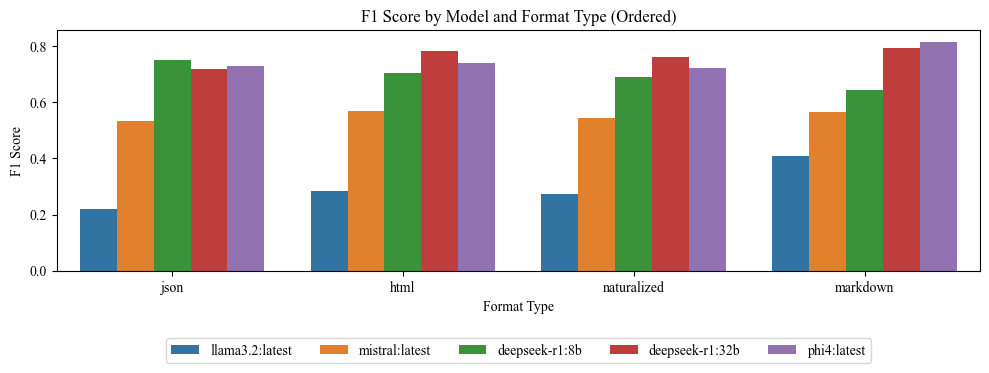

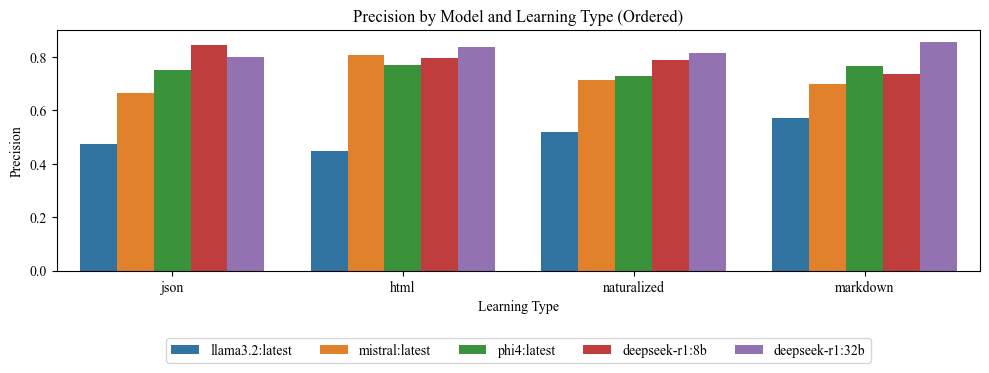

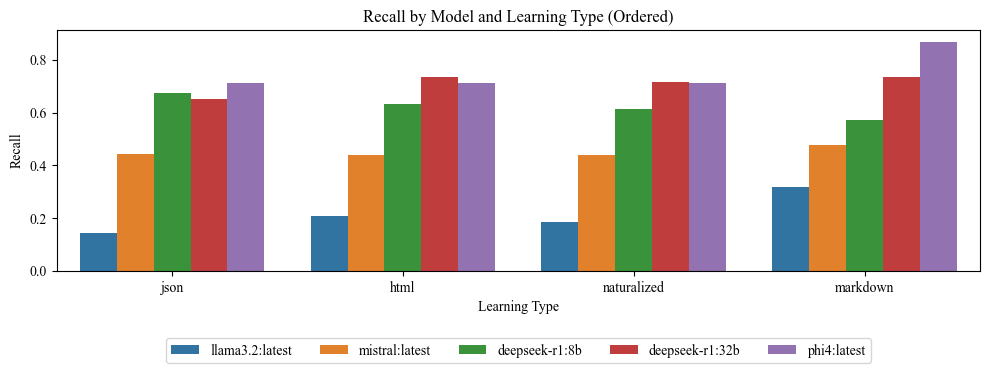

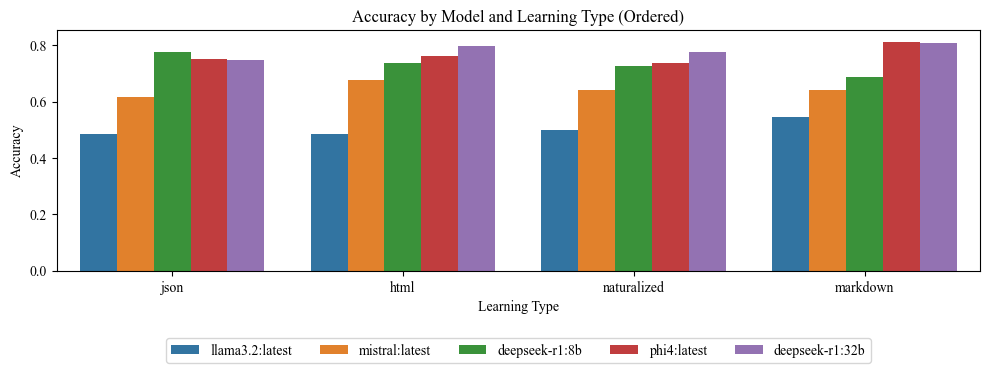

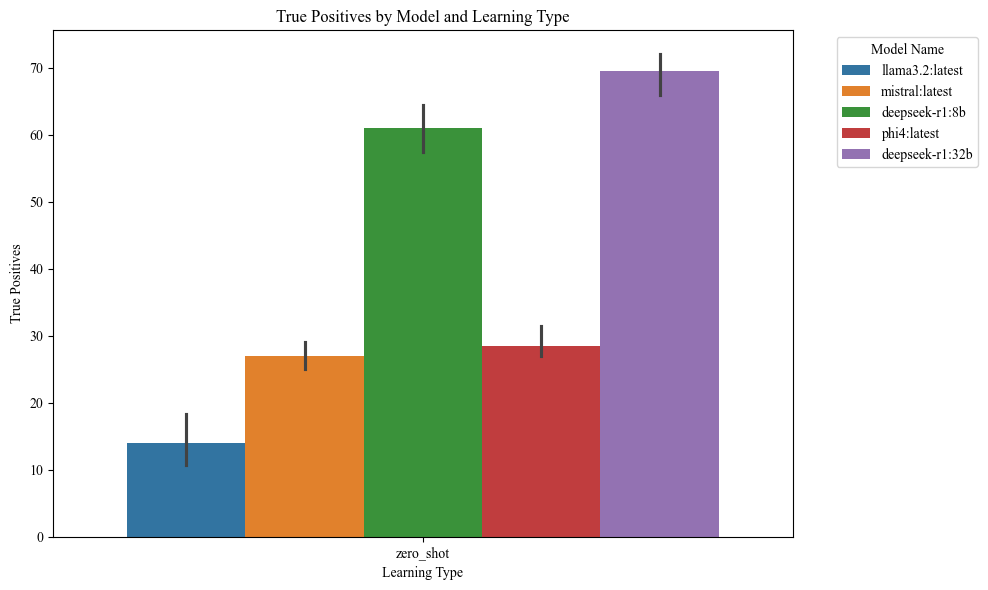

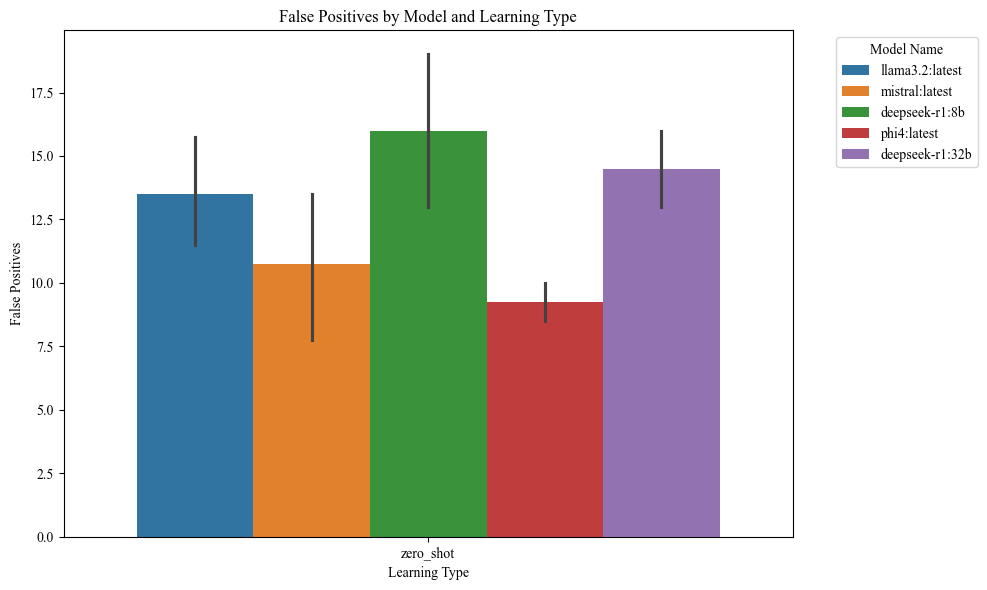

In [33]:
metrics_to_sort = ["f1_score", "precision", "recall", "accuracy"]
sorted_dfs = {
    metric: df_stats.sort_values(by=metric, ascending=True)
    for metric in metrics_to_sort
}

# Define a function to plot bar charts
def plot_metric_bar(metric, title, xlabel, ylabel, sorted_data, figsize=(10, 4)):  # Default figsize for LaTeX fitting
    plt.figure(figsize=figsize)
    sns.barplot(
        data=sorted_data,
        x="format_type",
        y=metric,
        hue="model_name",
        order=format_type_order,  # Fix format type order
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Move legend below the plot
    plt.legend(
        #title="LLM Architecture",
        loc="upper center",
        bbox_to_anchor=(0.5, -0.25),
        ncol=5  # Adjust columns as needed for better spacing
    )
    
    plt.tight_layout()
    plt.show()



# Visualization: F1 Score
plot_metric_bar(
    metric="f1_score",
    title="F1 Score by Model and Format Type (Ordered)",
    xlabel="Format Type",
    ylabel="F1 Score",
    sorted_data=sorted_dfs["f1_score"],
)

# Visualization: Precision
plot_metric_bar(
    metric="precision",
    title="Precision by Model and Learning Type (Ordered)",
    xlabel="Learning Type",
    ylabel="Precision",
    sorted_data=sorted_dfs["precision"],
)

# Visualization: Recall
plot_metric_bar(
    metric="recall",
    title="Recall by Model and Learning Type (Ordered)",
    xlabel="Learning Type",
    ylabel="Recall",
    sorted_data=sorted_dfs["recall"],
)

# Visualization: Accuracy
plot_metric_bar(
    metric="accuracy",
    title="Accuracy by Model and Learning Type (Ordered)",
    xlabel="Learning Type",
    ylabel="Accuracy",
    sorted_data=sorted_dfs["accuracy"],
)

# Plot Confusion Matrix components
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_stats,
    x="learning_type",
    y="true_positives",
    hue="model_name",
    order=df_stats["learning_type"].unique(),
)
plt.title("True Positives by Model and Learning Type")
plt.xlabel("Learning Type")
plt.ylabel("True Positives")
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_stats,
    x="learning_type",
    y="false_positives",
    hue="model_name",
    order=df_stats["learning_type"].unique(),
)
plt.title("False Positives by Model and Learning Type")
plt.xlabel("Learning Type")
plt.ylabel("False Positives")
plt.legend(title="Model Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

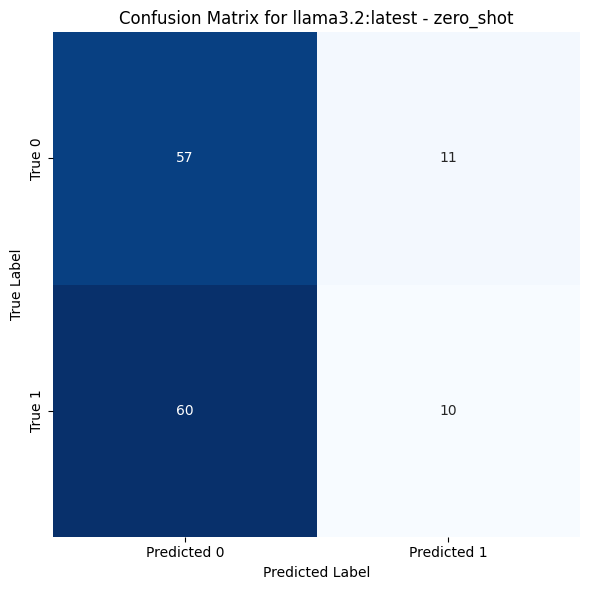

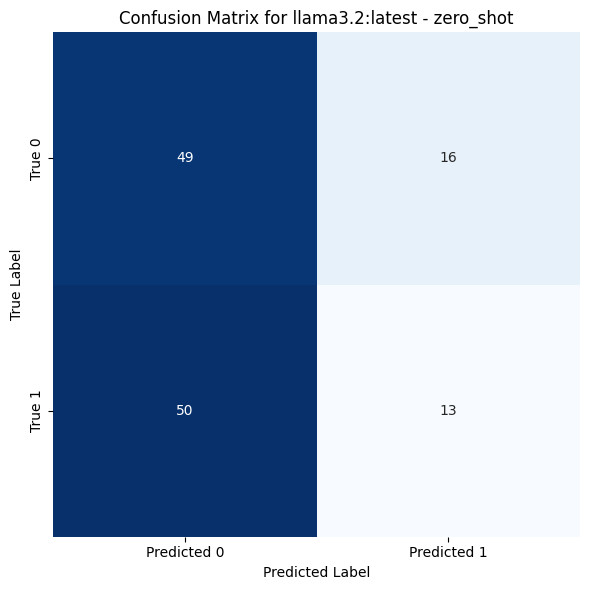

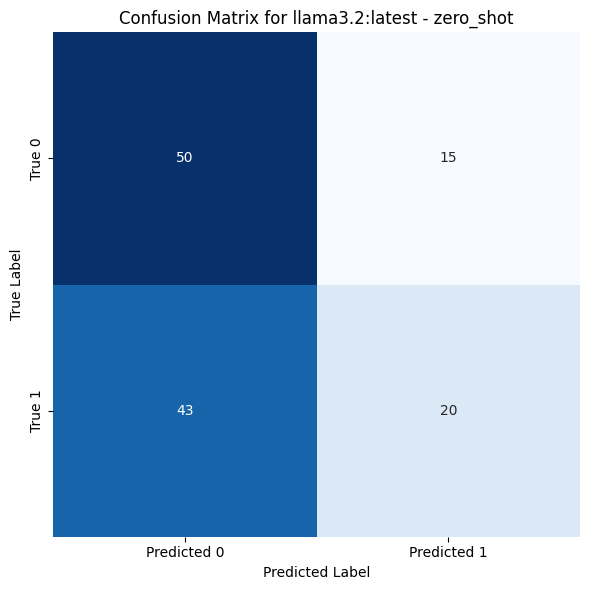

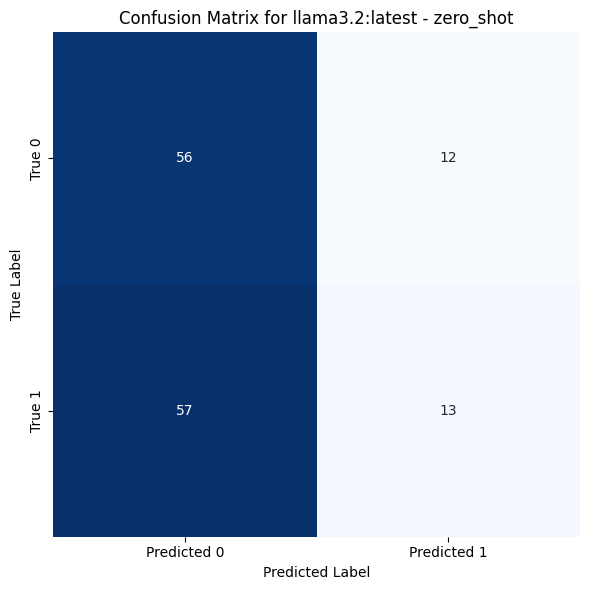

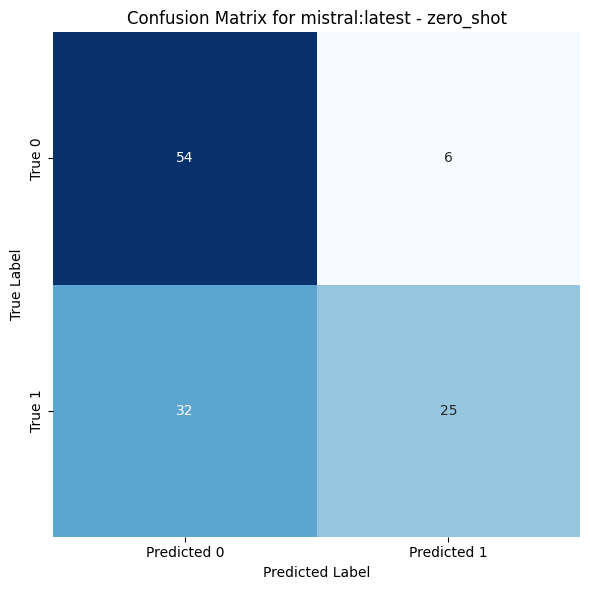

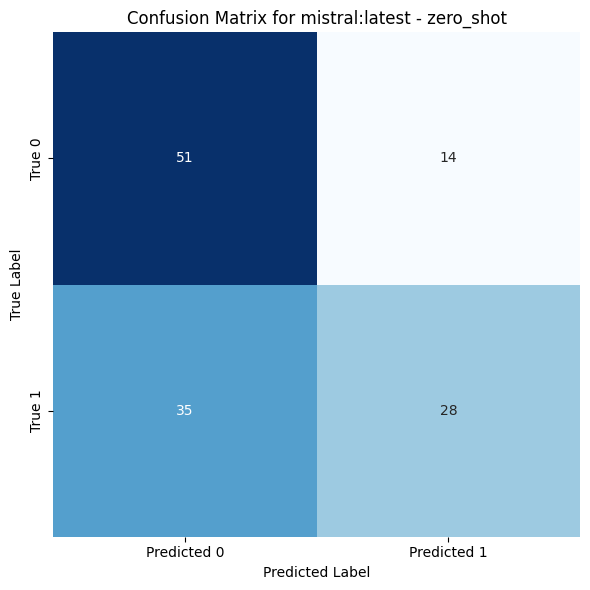

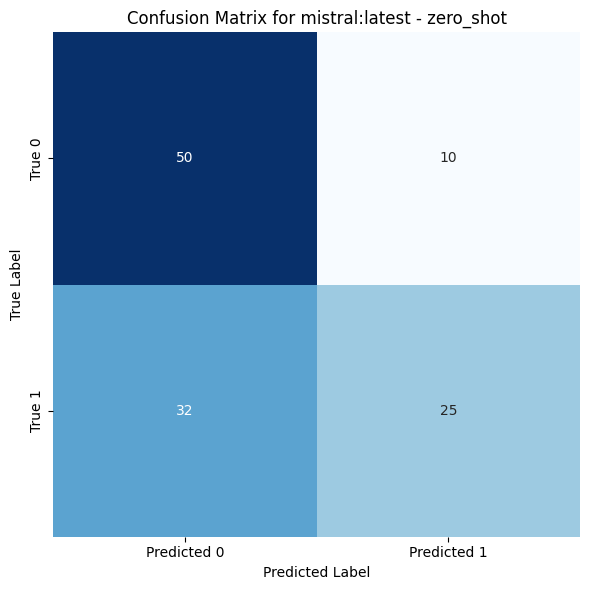

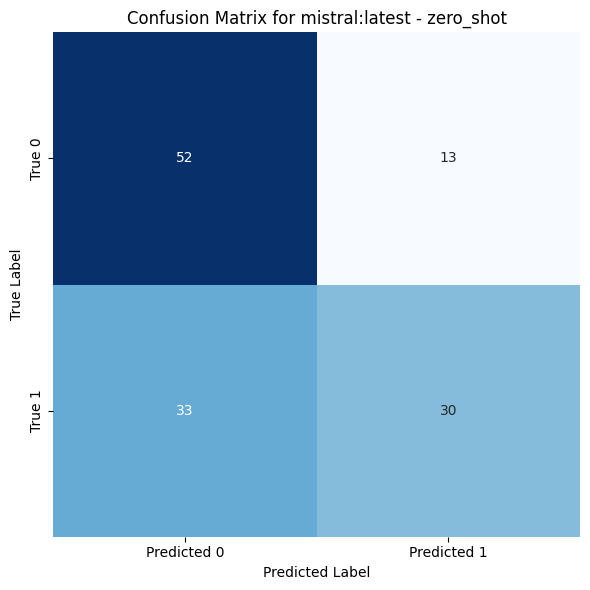

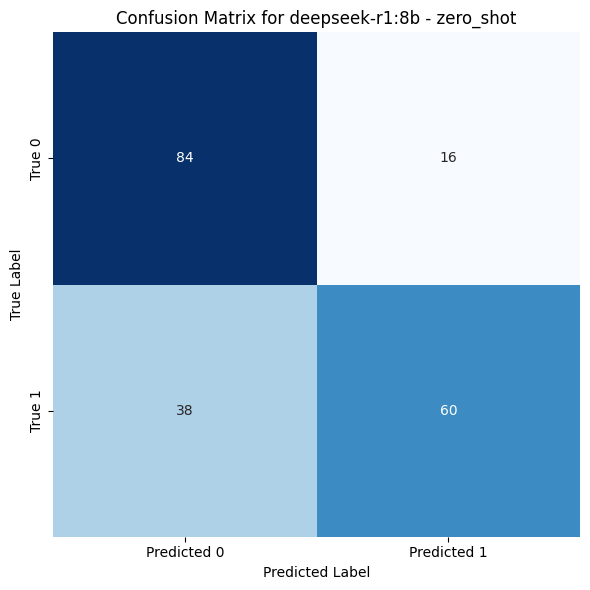

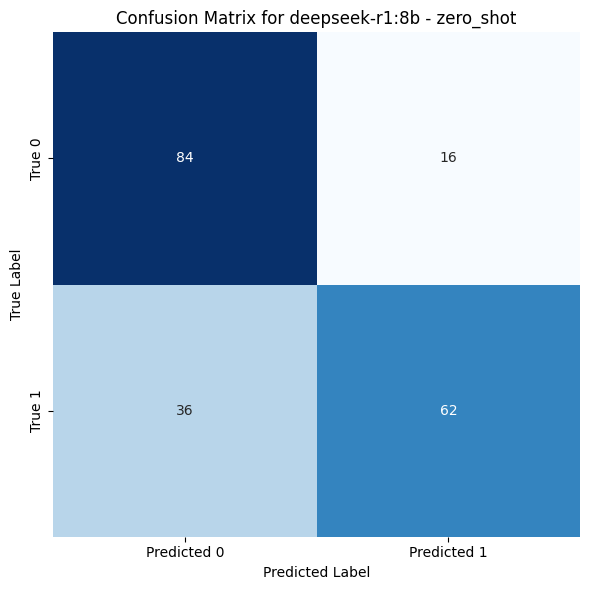

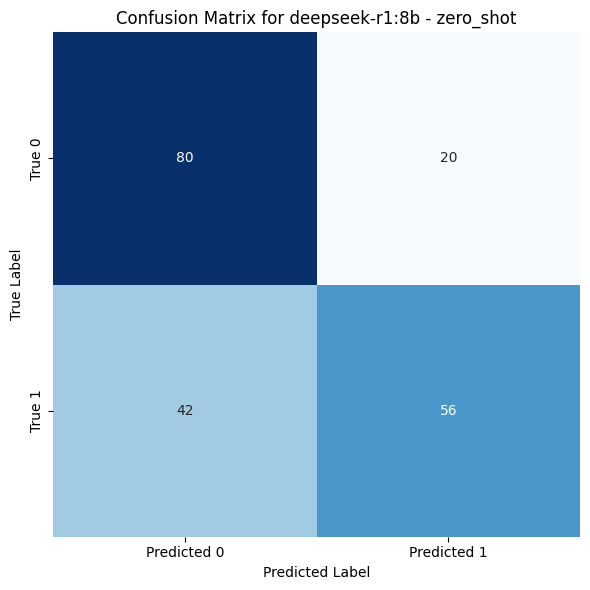

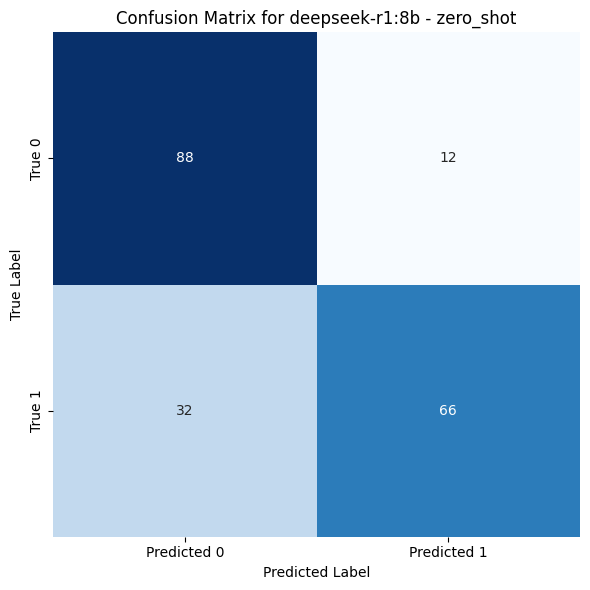

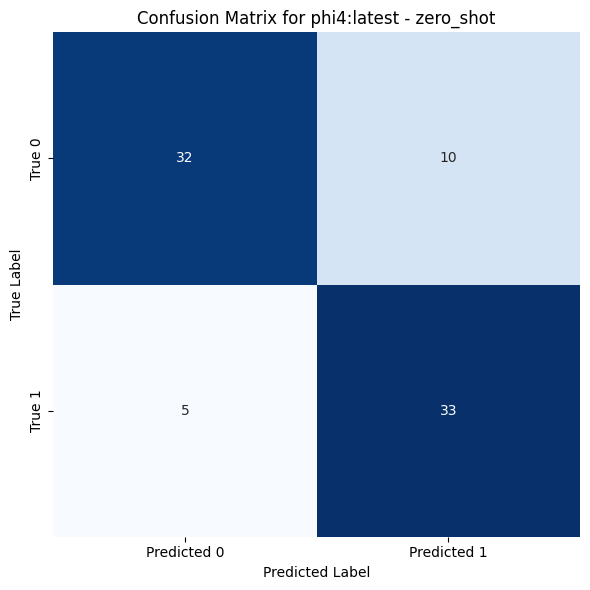

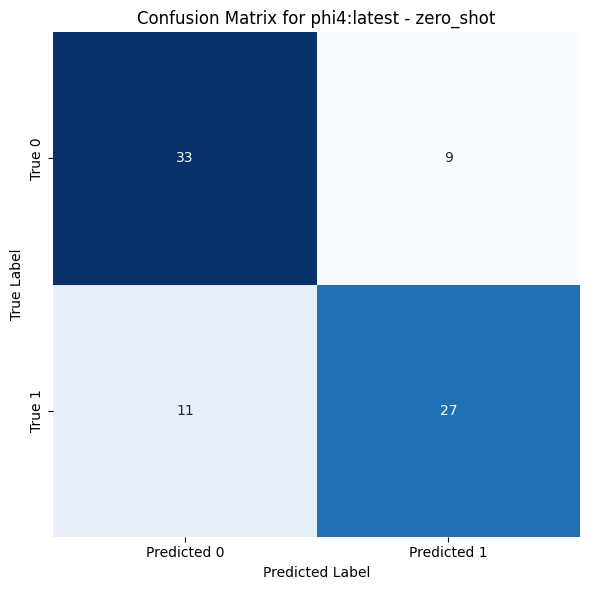

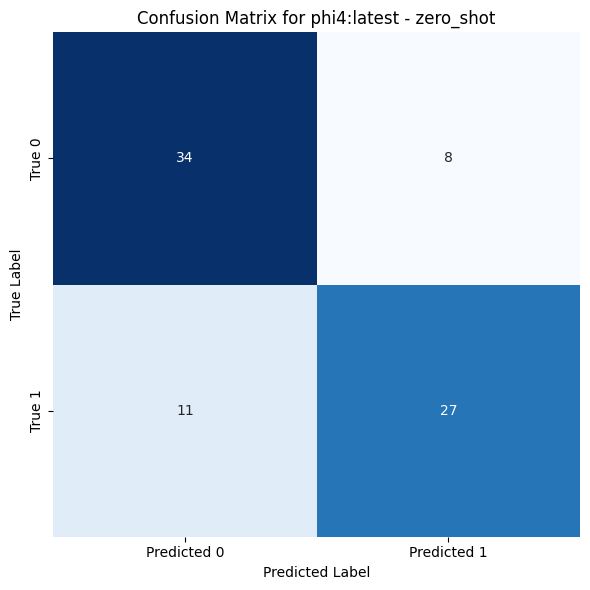

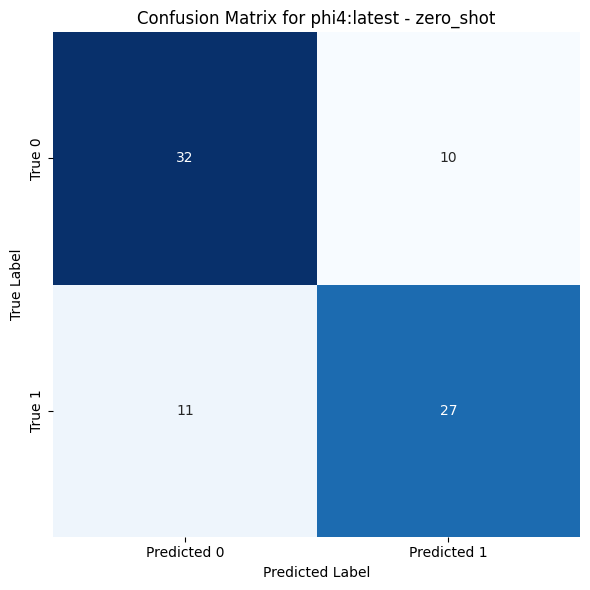

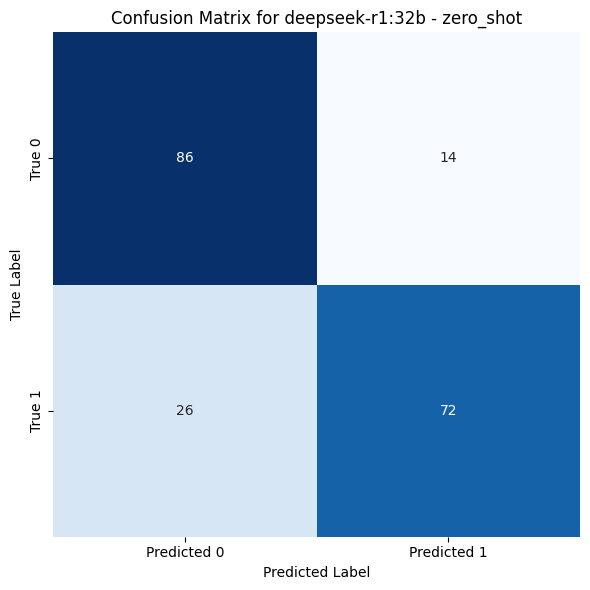

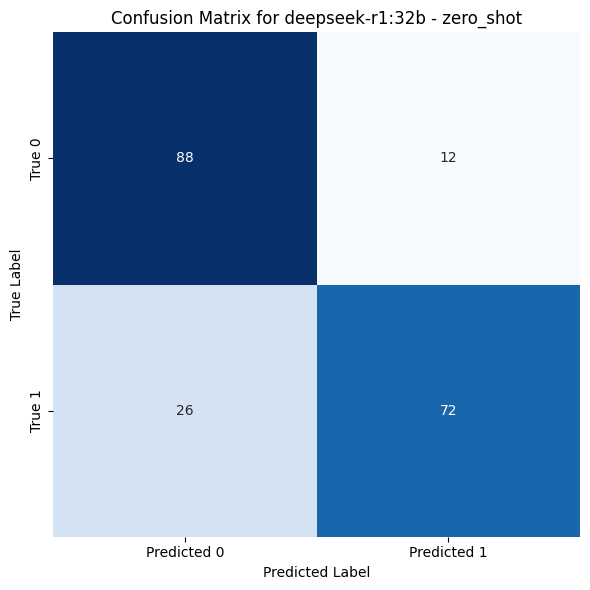

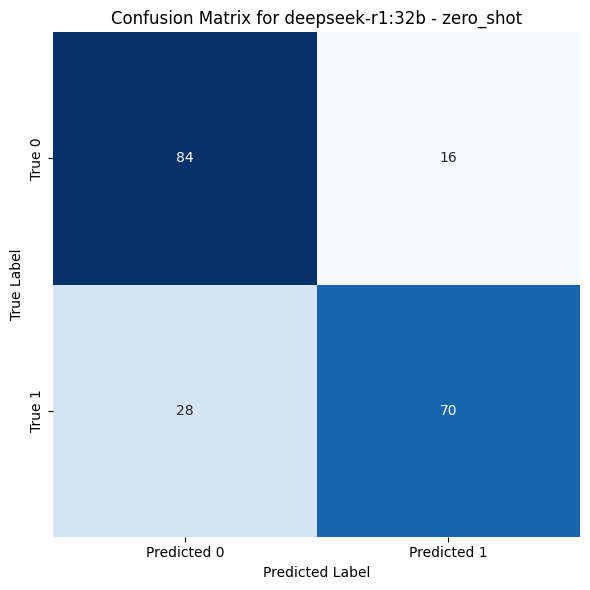

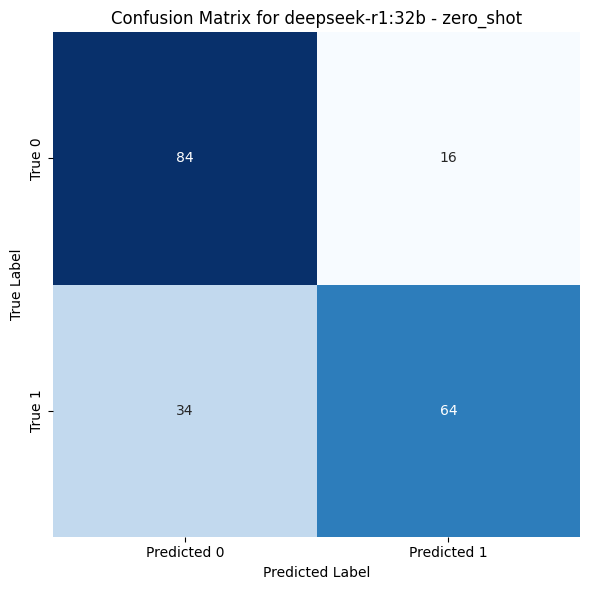

In [6]:
# Plot Confusion Matrices
def plot_confusion_matrix(row, title, figsize=(6, 6)):
    """
    Plot a single confusion matrix from a row in the DataFrame.

    Args:
        row (pd.Series): A single row of the DataFrame containing confusion matrix components.
        title (str): Title of the plot.
        figsize (tuple): Size of the plot.
    """
    cm = np.array(row["confusion_matrix"])
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["True 0", "True 1"])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Generate confusion matrices for each (model_name, learning_type)
for _, row in df_stats.iterrows():
    plot_confusion_matrix(
        row,
        title=f"Confusion Matrix for {row['model_name']} - {row['learning_type']}"
    )